# Differential equations and numerical integration
## Euler method

We will mainly use ordinary differential equations of the form.

\begin{equation}
\frac{d\vec{x}}{dt} = \vec{f}(\vec{x},\vec{p},t)
\end{equation}

Here $\vec{x}$ is a vector of state variables at time $t$.
The parameters of the system are represented
by the vector $\vec{p}$.

In one dimension, the system is written as
\begin{equation} \label{eq:SimpleEq}
\frac{dx}{dt} = f(x) \quad \mbox{with} \quad x(t=0) := x_0
\end{equation}

And the time-invariant steady states are
\begin{equation}
\frac{dx}{dt} = 0 \quad \Leftrightarrow \quad f(x^*) = 0
\end{equation}
The stability of the steady state is determined by the derivative: $f'(x^*)<0$.

The simplest way to solve the equation numerically 
is the Euler integration
\begin{equation}
f(x) = \frac{dx}{dt} \approx \frac{x(t+\Delta t) - x(t)}{\Delta t}
\end{equation}

We obtain
\begin{equation}
x(t+\Delta t) \; = \;  x(t) \; + \; \Delta t \;   f(x(t)) \; + \;  {\cal O}(\Delta t^2)
\end{equation}

Starting from an initial value $x_0$ at time $t=0$ the solution
can now be determined for later time points.

It is of importance to consider the error of the method.
The Euler method introduces an error of ${\cal O}(\Delta t^2)$ per
integration step.
To obtain the solution $x(t)$ at a time $t=T$, $N=T/\Delta t$ integration steps
have to be performed. 
The total error is therefore of the order ${\cal O}(T \Delta t)$ 
and decreases with decreasing $\Delta t$.
Euler integration is a first-order method.
The method is rarely used in real life (too inefficient).


\subsection*{The Euler Method}
\begin{equation} \label{eq:EulerSimpleEquation}
\frac{dx}{dt} = f(x) = -k x \quad \mbox{with} \quad x(0) = x_0
\end{equation}
For $k>0$ the equation has a stable fix-point at $x=0$. 
The analytical solution at time $t$ is 
\begin{equation} \label{eq:EulerBeispiel}
x(t) = x_0 \exp(-k t)
\end{equation}
We now write a simple function that compares the numerical integration 
of the simple system with the (known) analytical solution. 

We now write a simple function that compares the numerical integration 
of the simple system with the (known) analytical solution. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def SimpleEuler(x0,T,N):
    """ The function integrates the simple
    system dx/dt = -k x to a time T using the  
    Euler method (N Steps) and initial condition x0.

    usage: x = SimpleEuler(x0,T,N)
    """
    k = 1 # set parameter k

    # some parameters
    dt = float(T)/N
    timespan = np.arange(0,T,dt)
    x = [float(x0)]

    # integration
    for i in range(1,N):
        x.append(x[i-1]+dt*(-k*x[i-1]))
    # plot both solutions
    plt.plot(timespan,x,'bo',markersize=8,label='Euler method')
    plt.plot(timespan,x0*np.exp(-k*timespan),'r-',label='analytical solution')
    plt.xlabel('time t')
    plt.ylabel('x(t)')
    plt.legend(loc='upper right')
    plt.show()

    # return value of function
    x = x[N-1]

    return x, dt

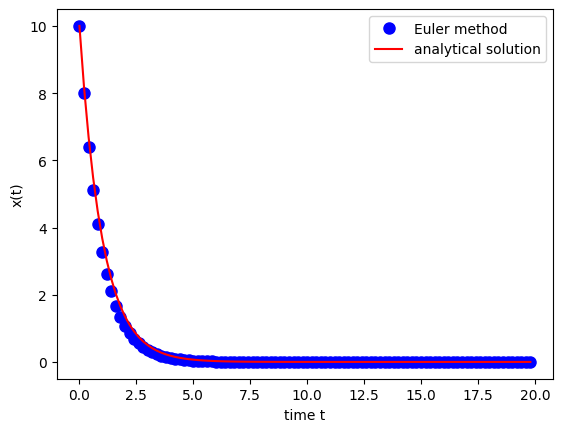

(2.5462949704181095e-09, 0.2)

In [3]:
SimpleEuler(x0=10, T=20, N=100)

**Exercise:** We do know the true value $x(t=1)$ using an analytical solution. Compare the numerical estimates for different values of `N` and plot the error as a function of `1/N`. 
What does `N` stand for? How does the graph look like? Why?

## Numerical integration in python
The module `scipy.integrate` offers a variety of build-in functions for numerical integration. We will mainly use the function `odeint`.

In [5]:
from scipy.integrate import odeint

We first consider a simple linear ODE of the form

\begin{equation}
\frac{dx}{dt} = c - k \cdot x ~~,
\end{equation}
where $c$ and $k$ are parameters.
The steady state $x^0$ of the system can be straightforwardly calculated

\begin{equation}
\frac{dx}{dt} =0 \quad \leftrightarrow \quad x^0 = \frac{c}{k}
\end{equation}

To solve the system numerically, we must implement the function $f(x,t) = c - k \cdot x$
into a user-defined {\tt python} function.

In [6]:
def simple_ode(x,t):
    """
    The function implements the simple linear
    ODE dxdt = c -k*x
    """
    # define parameters
    c = 1.0
    k = 2.0

    dxdt = c - k*x

    return dxdt 

To integrate the system numerically, we need to specify the initial condition $x^0 = x(t=0)$ and a timespan. Using `odeint`:

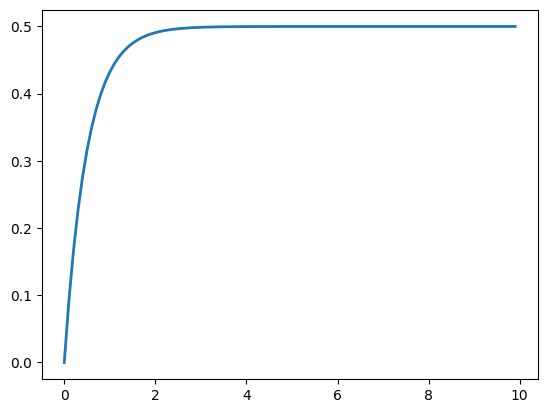

In [7]:
from scipy.integrate import odeint
import numpy as np
# from my_func import simple_ode

# initial condition and time span
T = np.arange(0, 10, 0.1)
X0 = 0

X = odeint(simple_ode, X0, T)
plt.plot(T, X, linewidth=2)
plt.show()

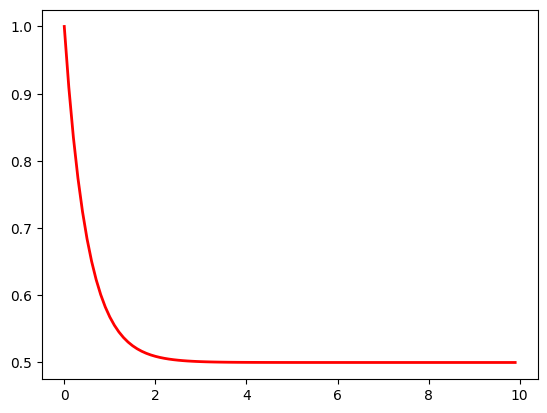

In [8]:
X0 = 1

X = odeint(simple_ode, X0, T)
plt.plot(T, X, 'r', linewidth=2)
plt.show()

## The Lorenz system
The Lorenz is small well-known ODE that shows some interesting behavior.
From wikipedia:
\begin{quote}
The Lorenz system is a system of ordinary differential equations (the Lorenz equations) first studied by Edward Lorenz. It is notable for having chaotic solutions for certain parameter values and initial conditions. In particular, the Lorenz attractor is a set of chaotic solutions of the Lorenz system which, when plotted, resemble a butterfly or figure eight.

$\dots$

In 1963, Edward Lorenz developed a simplified mathematical model for atmospheric convection. [...]
\end{quote}

The Lorenz system is three-dimensional, the equations are 
\begin{equation}
\begin{array}{cl}
\qquad & \frac{dx}{dt} = \sigma ( y(t) - x(t) ) \\
\qquad & \frac{dy}{dt} = -x(t) \, z(t) + r x(t) - y(t) \\ 
\qquad & \frac{dz}{dt} = x(t) \, y(t) - b z(t)
\end{array}
\end{equation}

We have to implement the corresponding function file that returns the derivative. This time
the function return a vector with three components. Note that here $x$ is understood as $x = [x,y,z]$.

In [9]:
# implements the Lorenz System
# x is a three-dimensional vector

def LorenzSys(x,t):

    # define parameters
    r = 45.92
    b = 4.0
    sig = 16.0

    dxdt =  sig*(x[1]-x[0]);
    dydt = -x[0]*x[2] + r*x[0] - x[1]
    dzdt =  x[0]*x[1] - b*x[2]

    # the function returns the vector fx
    df = [dxdt,dydt,dzdt]
    return df

The numerical integration is as usual:

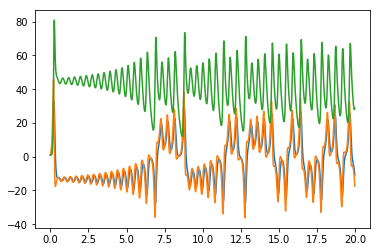

In [9]:
from scipy.integrate import odeint
# from my_func import LorenzSys

T = np.arange(0, 20, 0.01)
X0 = [1, 1, 1]

X = odeint(LorenzSys, X0, T)
plt.plot(T, X)
plt.show()

The components can also be visualized individually. 
Note that `X` is a matrix with three columns. `X[:,0]` denotes the first column.

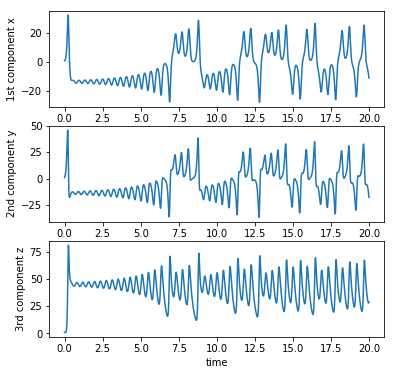

In [10]:
plt.figure(figsize=(6,6))
plt.subplot(311); plt.plot(T,X[:,0])
plt.xlabel('time'); plt.ylabel('1st component x')
plt.subplot(312); plt.plot(T,X[:,1])
plt.xlabel('time'); plt.ylabel('2nd component y')
plt.subplot(313); plt.plot(T,X[:,2])
plt.xlabel('time'); plt.ylabel('3rd component z')

plt.savefig('./results/lorenz_plot01.png')

plt.show()

We can also use a three-dimensional plot.

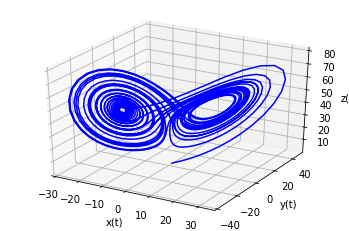

In [11]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.gca(projection='3d')

ax.plot(X[:,0],X[:,1],X[:,2], 'b-')
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')

plt.show()

## The Lotka-Volterra System
We want to implement the two-dimensional Lotka-Volterra System. A suitable function is

In [12]:
def LotkaVolterra(x,t):
    """
    Implements the Lotka-Volterra System x is a two-dimensional vector
    
    usage: 
    T = np.arange(0,50,0.1)
    x = odeint(LotkaVolterra,[1,1],T)
    """

    # define parameters
    X = x[0]
    Y = x[1]

    a = 1
    b = 2
    g = 1.5
    d = 2

    dxdt = a*X - b*X*Y
    dydt = g*X*Y - d*Y

    # the function returns the vector fx
    df = [dxdt, dydt]

    return df

The isoclines can be plotted as follows

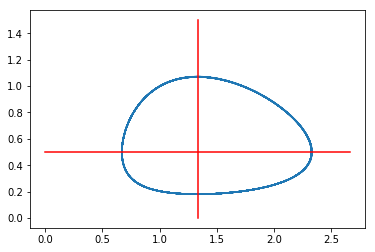

In [13]:
T = np.arange(0, 50, 0.1)
x = odeint(LotkaVolterra, [1,1], T)

a = 1
b = 2
g = 1.5
d = 2

plt.plot(x[:,0],x[:,1])
plt.plot([d/g, d/g],[0, 3*a/b],'r-')
plt.plot([0, 2*d/g],[a/b, a/b],'r-')
plt.show()

**Exercise:** Compare the solutions with the isocline for different parameter values.

We can also have a more detailed look on the phase plane. A suitable method are quiver plots (`help(plt.quiver)`.

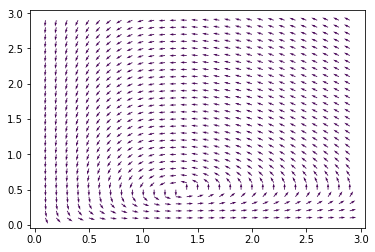

In [14]:
x = np.arange(0.1,3,0.1); y = np.arange(0.1,3,0.1)
[xg,yg] = np.meshgrid(x,y)
n = np.size(x); m = np.size(x)
u = np.zeros([n,m])
v = np.zeros([n,m])

for i in range(n):
    for j in range(m):
        df = LotkaVolterra([xg[i,j],yg[i,j]],1)
        df = df/np.linalg.norm(df)
        u[i,j] = df[0]
        v[i,j] = df[1]

h = plt.quiver(xg,yg,u,v,0.5)
plt.show()